# Homework 6. KNN - Handwritten digits

***Double Click here to edit this cell***

- Name: 허성일
- Student ID: 201603727
- Submission date: 2020.06.08

### We have 1797 handwritten digits of size 8x8 

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [2]:
digits.target.shape

(1797,)

### Try with some handwritten images

Target is 0
Data is :

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<Figure size 432x288 with 0 Axes>

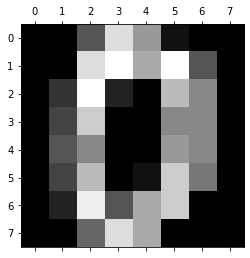

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt 

k = 0
print('Target is {}'.format(digits.target[k]))
print('Data is :\n')
print(digits.data[k].reshape(8,8))
plt.gray()
plt.matshow(digits.images[k]) 
plt.show() 

# Problem 1 (30 pts)

- We want to classify handwritten digits using **k nearest neighbor classifier**

## STEP 1

- import whatever you need
- don't modify the random number seed
- you must set "np.random.seed(0)"" before you do "train_test_split"
- Split the data into training dataset (2/3 of the total data), test dataset(1/3 of the total data)

In [4]:
from sklearn import datasets

digits = datasets.load_digits()

# YOUR CODE HERE
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(0)
digits_df = pd.DataFrame(digits.data, columns = digits.feature_names)
digits_target_df = pd.DataFrame(digits.target)
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.33)

## STEP 2

- Use sklearn k nearest neighbor classifier to classify digits
- Print confusion matrix, classification report, accuracy
- This homework will be graded based on **accuracy**

In [5]:
# YOUR CODE HERE
k_max_score = [0,0]#optimize_k, score
for k in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test, y_test)
    if score > k_max_score[1]:
        k_max_score = [k,score]

neigh = KNeighborsClassifier(n_neighbors=k_max_score[0])
neigh.fit(X_train, y_train)
predict = neigh.predict(X_test)

cm = confusion_matrix(y_test,predict)
cr = classification_report(y_test,predict)
accuracy = k_max_score[1]

print('confusion matrix : \n')
print(cm)
print('\n\nclassification_report : \n')
print(cr)
print('Average accuracy = {:.2f}%'.format(accuracy*100))

confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 64  0]
 [ 0  0  0  3  0  1  0  0  0 58]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        62
           3       0.93      1.00      0.96        55
           4       1.00      1.00      1.00        50
           5       0.98      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.96      0.98        67
           9       0.98      0.94      0.96        62

    accuracy            

My result:
```
confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 64  0]
 [ 0  0  0  3  0  1  0  0  0 58]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        62
           3       0.93      1.00      0.96        55
           4       1.00      1.00      1.00        50
           5       0.98      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.96      0.98        67
           9       0.98      0.94      0.96        62

    accuracy                           0.98       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.98      0.98       594

Average accuracy = 98.48%
```

## State-of-the-Art of MNIST classification: 99.79%

- https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html
- MNIST dataset is much bigger dataset: 60,000 training images and 10,000 testing images

# Problem 2 (30 pts)

- If you choose any hyperparameters and you did any transformation in your data, justify your choice and transformation.
- The justification must be code, data, or plotted images, **not your guess!!!**
- This must be a longer code. 
- Use plotted image whenever possible.
- You may add as many cells as you want.
- To add a cell, insert->insert cell or click '+' button above in the notebook.
- you must set "np.random.seed(0)"" before you do "train_test_split"

In [6]:
# ADD YOUR CELL
# you must set "np.random.seed(0)"" before you do "train_test_split"

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import datasets

digits = datasets.load_digits()

np.random.seed(0)
digits_df = pd.DataFrame(digits.data, columns = digits.feature_names)
digits_target_df = pd.DataFrame(digits.target)

In [8]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.33)

In [9]:
pca_accuracy=[]
for pc in range(1,64):
    np.random.seed(0)
    pca = PCA(n_components=pc)
    pca_digits_df=pca.fit_transform(digits_df)
    np.random.seed(0)
    X_train, X_test, y_train, y_test = train_test_split(pca_digits_df,digits.target, test_size=0.33)
    
    #계산
    # YOUR CODE HERE
    k_max_score = [0,0]#optimize_k, score
    for k in range(1,30):
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train, y_train)
        score = neigh.score(X_test, y_test)
        if score > k_max_score[1]:
            k_max_score = [k,score]
    neigh = KNeighborsClassifier(n_neighbors=k_max_score[0])
    neigh.fit(X_train, y_train)
    predict = neigh.predict(X_test)

    accuracy = k_max_score[1]

    print('pca dim = {}, Average accuracy = {:.2f}%, k ={}'.format(pc, accuracy*100,  k_max_score[0]))
    pca_accuracy.append(accuracy*100)

pca dim = 1, Average accuracy = 34.85%, k =23
pca dim = 2, Average accuracy = 63.80%, k =25
pca dim = 3, Average accuracy = 74.41%, k =26
pca dim = 4, Average accuracy = 85.35%, k =5
pca dim = 5, Average accuracy = 90.74%, k =4
pca dim = 6, Average accuracy = 92.26%, k =3
pca dim = 7, Average accuracy = 95.96%, k =4
pca dim = 8, Average accuracy = 96.30%, k =4
pca dim = 9, Average accuracy = 97.47%, k =3
pca dim = 10, Average accuracy = 97.81%, k =3
pca dim = 11, Average accuracy = 97.98%, k =1
pca dim = 12, Average accuracy = 97.98%, k =1
pca dim = 13, Average accuracy = 97.98%, k =3
pca dim = 14, Average accuracy = 97.98%, k =1
pca dim = 15, Average accuracy = 98.15%, k =1
pca dim = 16, Average accuracy = 98.32%, k =3
pca dim = 17, Average accuracy = 98.32%, k =1
pca dim = 18, Average accuracy = 98.15%, k =1
pca dim = 19, Average accuracy = 98.32%, k =3
pca dim = 20, Average accuracy = 98.48%, k =1
pca dim = 21, Average accuracy = 98.48%, k =1
pca dim = 22, Average accuracy = 98.48%,

In [10]:
print("pca dim = {}, Average accuracy = {:.2f}%, k={}".format(pca_accuracy.index(max(pca_accuracy))+1, max(pca_accuracy),k_max_score[0]))

pca dim = 20, Average accuracy = 98.48%, k=1


In [11]:
for p in range(10,100,10):
    np.random.seed(0)
    tsne=TSNE(n_components = 2,  perplexity = p,learning_rate = 200)
    new_digits_df = tsne.fit_transform(digits_df)
    
    np.random.seed(0)
    X_train, X_test, y_train, y_test = train_test_split(new_digits_df,digits.target, test_size=0.33)
    k_max_score=[0,0]
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test, y_test)
    predict = neigh.predict(X_test)
    
    print('p = {} Average accuracy = {:.2f}%'.format(p, score*100))

p = 10 Average accuracy = 98.82%
p = 20 Average accuracy = 98.82%
p = 30 Average accuracy = 98.65%
p = 40 Average accuracy = 98.65%
p = 50 Average accuracy = 98.65%
p = 60 Average accuracy = 98.82%
p = 70 Average accuracy = 98.82%
p = 80 Average accuracy = 98.15%
p = 90 Average accuracy = 98.15%


In [12]:
for p in range(10,100,10):
    np.random.seed(0)
    tsne=TSNE(n_components = 1,  perplexity = p,learning_rate = 200)
    new_digits_df = tsne.fit_transform(digits_df)
    
    np.random.seed(0)
    X_train, X_test, y_train, y_test = train_test_split(new_digits_df,digits.target, test_size=0.33)
    k_max_score=[0,0]
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test, y_test)
    predict = neigh.predict(X_test)
    
    print('p = {} Average accuracy = {:.2f}%'.format(p, score*100))

p = 10 Average accuracy = 98.65%
p = 20 Average accuracy = 98.48%
p = 30 Average accuracy = 97.64%
p = 40 Average accuracy = 97.31%
p = 50 Average accuracy = 97.31%
p = 60 Average accuracy = 97.47%
p = 70 Average accuracy = 96.80%
p = 80 Average accuracy = 97.31%
p = 90 Average accuracy = 96.30%


In [13]:
for p in range(10,100,10):
    np.random.seed(0)
    tsne=TSNE(n_components = 3,  perplexity = p,learning_rate = 200)
    new_digits_df = tsne.fit_transform(digits_df)
    
    np.random.seed(0)
    X_train, X_test, y_train, y_test = train_test_split(new_digits_df,digits.target, test_size=0.33)
    k_max_score=[0,0]
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test, y_test)
    predict = neigh.predict(X_test)
    
    print('p = {} Average accuracy = {:.2f}%'.format(p, score*100))

p = 10 Average accuracy = 98.65%
p = 20 Average accuracy = 98.82%
p = 30 Average accuracy = 98.82%
p = 40 Average accuracy = 98.82%
p = 50 Average accuracy = 98.82%
p = 60 Average accuracy = 98.82%
p = 70 Average accuracy = 98.82%
p = 80 Average accuracy = 98.82%
p = 90 Average accuracy = 98.65%


In [18]:
for lr in range(100,1000,100):
    np.random.seed(0)
    tsne=TSNE(n_components = 3,  perplexity = 10,learning_rate = lr)
    new_digits_df = tsne.fit_transform(digits.data)

    np.random.seed(0)
    X_train, X_test, y_train, y_test = train_test_split(new_digits_df,digits.target, test_size=0.33)
    
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test, y_test)
    predict = neigh.predict(X_test)

    print('lr = {} Average accuracy = {:.2f}%'.format(lr, score*100))

lr = 100 Average accuracy = 98.65%
lr = 200 Average accuracy = 98.65%
lr = 300 Average accuracy = 98.15%
lr = 400 Average accuracy = 98.15%
lr = 500 Average accuracy = 97.47%
lr = 600 Average accuracy = 94.28%
lr = 700 Average accuracy = 87.21%
lr = 800 Average accuracy = 87.37%
lr = 900 Average accuracy = 84.68%


In [16]:
for lr in range(100,1000,100):
    np.random.seed(0)
    tsne=TSNE(n_components = 3,  perplexity = 20,learning_rate = lr)
    new_digits_df = tsne.fit_transform(digits.data)

    np.random.seed(0)
    X_train, X_test, y_train, y_test = train_test_split(new_digits_df,digits.target, test_size=0.33)
    
    neigh = KNeighborsClassifier(n_neighbors=1)
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test, y_test)
    predict = neigh.predict(X_test)

    print('lr = {} Average accuracy = {:.2f}%'.format(lr, score*100))

lr = 100 Average accuracy = 98.99%
lr = 200 Average accuracy = 98.82%
lr = 300 Average accuracy = 98.99%
lr = 400 Average accuracy = 98.65%
lr = 500 Average accuracy = 97.14%
lr = 600 Average accuracy = 95.79%
lr = 700 Average accuracy = 91.75%
lr = 800 Average accuracy = 88.38%
lr = 900 Average accuracy = 84.01%


In [19]:
np.random.seed(0)
tsne=TSNE(n_components = 3,  perplexity = 30,learning_rate = 100)
new_digits_df = tsne.fit_transform(digits.data)

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(new_digits_df,digits.target, test_size=0.33)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
score = neigh.score(X_test, y_test)
predict = neigh.predict(X_test)

print('lr = {} Average accuracy = {:.2f}%'.format(100, score*100))

lr = 100 Average accuracy = 98.99%


In [20]:
np.random.seed(0)
tsne=TSNE(n_components = 3,  perplexity = 40,learning_rate = 100)
new_digits_df = tsne.fit_transform(digits.data)

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(new_digits_df,digits.target, test_size=0.33)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
score = neigh.score(X_test, y_test)
predict = neigh.predict(X_test)

print('lr = {} Average accuracy = {:.2f}%'.format(100, score*100))

lr = 100 Average accuracy = 98.82%


In [30]:
np.random.seed(0)
tsne=TSNE(n_components = 3,  perplexity = 50,learning_rate = 100)
new_digits_df = tsne.fit_transform(digits_df)

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(new_digits_df,digits.target, test_size=0.33)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
score = neigh.score(X_test, y_test)
predict = neigh.predict(X_test)

print('lr = {} Average accuracy = {:.2f}%'.format(100, score*100))

lr = 100 Average accuracy = 98.82%


In [22]:
np.random.seed(0)
tsne=TSNE(n_components = 3,  perplexity = 60,learning_rate = 100)
new_digits_df = tsne.fit_transform(digits.data)

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(new_digits_df,digits.target, test_size=0.33)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
score = neigh.score(X_test, y_test)
predict = neigh.predict(X_test)

print('lr = {} Average accuracy = {:.2f}%'.format(100, score*100))

lr = 100 Average accuracy = 98.82%


In [21]:
np.random.seed(0)
tsne=TSNE(n_components = 3,  perplexity = 70,learning_rate = 100)
new_digits_df = tsne.fit_transform(digits.data)

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(new_digits_df,digits.target, test_size=0.33)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
score = neigh.score(X_test, y_test)
predict = neigh.predict(X_test)

print('lr = {} Average accuracy = {:.2f}%'.format(100, score*100))

lr = 100 Average accuracy = 98.82%


In [32]:
np.random.seed(0)
tsne=TSNE(n_components = 3,  perplexity = 20,learning_rate = 100)
new_digits_df = tsne.fit_transform(digits.data)

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(new_digits_df,digits.target, test_size=0.33)

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train)
predict = neigh.predict(X_test)
score = neigh.score(X_test, y_test)

cm = confusion_matrix(y_test,predict)
cr = classification_report(y_test,predict)

print('confusion matrix : \n')
print(cm)
print('\n\nclassification_report : \n')
print(cr)
print('Average accuracy = {:.2f}%'.format(score*100))

confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 61  1  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  0  0  0  0  0 65  0]
 [ 0  0  0  1  0  0  0  0  0 61]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      0.98      0.99        62
           3       0.96      1.00      0.98        55
           4       1.00      1.00      1.00        50
           5       1.00      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.97      0.98        67
           9       0.98      0.98      0.98        62

    accuracy            

- This is my result. 

```
confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 61  1  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  0  0  0  0  0 65  0]
 [ 0  0  0  1  0  0  0  0  0 61]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      0.98      0.99        62
           3       0.96      1.00      0.98        55
           4       1.00      1.00      1.00        50
           5       1.00      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.97      0.98        67
           9       0.98      0.98      0.98        62

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594

Average accuracy = 98.99%
```

### Written justification for your hyperparameter choice and data transformation

- WRITE HERE (To edit, double click this cell)
문제1에서 64pixel로 구성된 digits data를 이웃의 수 k를 1부터 30까지 1씩 증가시키며 최적의 k값이 1이라는 것을 확인했습니다.  
문제2에서 64pixel, 64차원의 데이터를 차원을 감소시키면서 정확도 확인했습니다.  
먼저 pca를 이용해서 차원을 감소시킬 때마다 accuracy를 확인하야겠다 생각했습니다.  
pca로 1차원부터 63차원 까지 감소시켰을 때 19차원에서부터 98.43으로 accuracy를 확인했습니다.  
tsne로 차원을 감소시키기는 것은 1,2,3차원만 가능합니다.  
2차원으로 차원을 감소시켜보았습니다.  
tsne로 차원을 감소시킬 때 매개변수로 존재하는 여러 값 중 큰 영향력을 미칠 것이라 판단되는 perplexity와 learning rate를 변화시키면 확인해보았습니다.  
tsne로 1,2,3차원의 learning rate의 기본값인 200일 때 perplexity값의 변화를 확인 했을 때 98.82의 결과를 확인했습니다.  
98.82의 결과가 3차원에서 가장 많이 나와서 3차원을 기준으로 모든 차원에서 동일하게 98.82가 나온 곳의 20,60,70 이여서 10~80 범위의 learning rate를 변화시켰습니다.  
perplexity가 20일 때 learning rate 100,300에서 98.99를 확인할 수 있었습니다.  
perplexity가 10,20일때 learning rate이 증가할수록 감소되는 경향을 보였고 500이 넘어가면 많이 작아지는 것을 확인되어서 perplexity 30부터는 learning rate를 100일 경우로 고정을 시켜 보았습니다.  
이후 98.99를 넘는 결과를 확인할 수 없었고 perplexity = 20, learning rate = 100, n_components = 3에서 최대 accuracy 98.99를 얻었습니다.
이번 과제에서 random seed에 대해 많은 주의를 주셨지만 random seed를 잘 못 생각하고 다시 진행했습니다. 
그리고 처음에 split을 먼저하고 차원을 감소했을 때 아주 낮은 accuracy를 얻는 다는 것을 확인했습니다.  


## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit
- Run **all cells**
- Goto "File -> Print Preview" (If that doesn't work, you may print ipynb file in Google Chrome print menu)
- Print the page as pdf
- Submit the pdf file in google classroom
- No late homeworks accepted